# Principal Component Analysis (PCA)

Objetivo: Comprender el uso de PCA y aplicarlo a un dataset.

PCA es una técnica de reducción de dimensionalidad que se puede emplear para pre-procesamiento y visualización de datos. Se define como una transformación de un espacio vectorial de alta dimensionalidad a un espacio de menor dimensionalidad. Los datos se proyectan en la dirección de máxima varianza, también se buscan las direcciónes donde el error de reconstrucción de los datos es menor.

Si se asume que se tiene una matriz de datos $X \in^{n \times d}$ donde  $x_i \in \mathbb{R}^d$

La matriz de covarianza de $X$ es $C \in \mathbb{R}^{d \times d}$ y se define por

$$ C = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)(x_i - \mu)^T$$

donde $\mu \in \mathbb{R}^d$ es la media 

$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i$$

Singular value decomposition (SVD) descompone la matriz $A$ en eigenvectores y una matriz diagonal de valores singulares  $\Sigma \in \mathbb{R}^{n \times d}$, donde cada valor singular está asociado a un eigenvector. En otra forma de mostrar PCA,  se descompone la matriz $\frac{1}{n} X^TX$ que es la matriz de covarianza de los datos centrados, donde $\mu$ es nulo:

$$ A = U \Sigma V^T$$

donde $U \in \mathbb{R}^{n \times n}$ y $V \in \mathbb{R}^{d \times d}$

Si se toman los datos $X^T X$, se puede mostrar que $A^T A = V \Sigma^{2} V^T$, donde las columnas de $V^T$ contienen los eigenvectores de $X^T X$. Los datos transformados a una menor dimensión se obtienen por $N=XP$ donde la matriz $P \in \mathbb{R}^{d \times f}$ contiene $f < d$ eigenvectores de $V$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Análisis exploratorio
### Etiquetas de clase a valor numérico
- Número de variables y etiquetas
- Valores caracter a numérico

In [2]:
df = pd.read_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df = df.replace({'setosa':0, 'versicolor':1, 'virginica' :2})

In [6]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
df.drop('species', axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


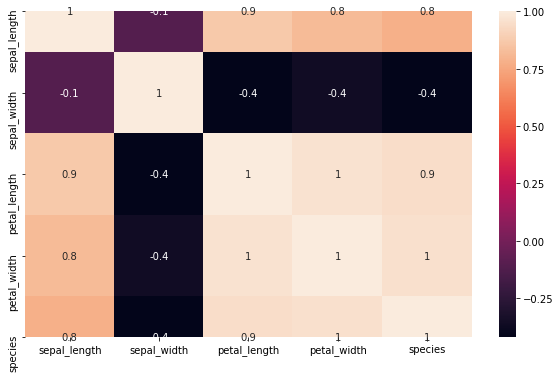

In [8]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.1g')

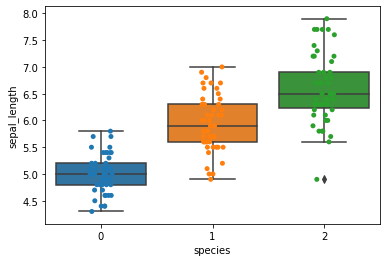

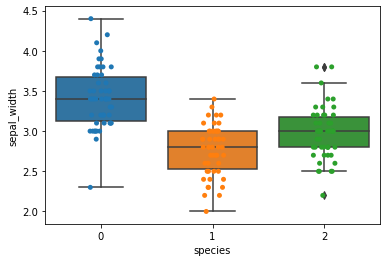

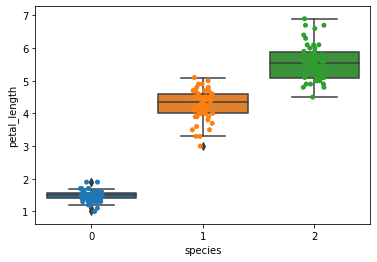

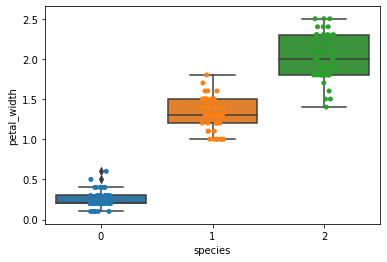

In [9]:
l=list(df.columns)
l[0:len(l)]
for i in range(0,len(l)-1):
    plt.figure()
    sns.boxplot(x='species' ,y=l[i], data=df)
    sns.stripplot(x='species' ,y=l[i], data=df)

    

## Plot de dos variables en 2d
- Se puede conseguir una mejor visualización con pca

In [10]:
target_ids = np.unique(df.values[:,-1])
X_plot = np.concatenate(([df['sepal_width'].values], [df['petal_width'].values]), axis=0)
y = df['species'].values

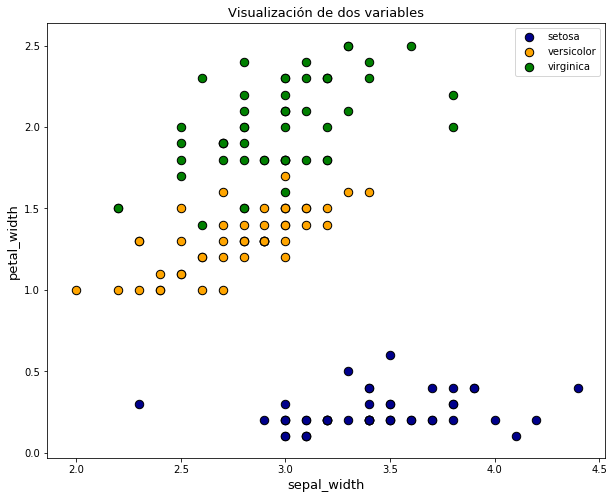

In [11]:
plt.figure(figsize=(10,8))
colors = ['darkblue','orange','green']
target_names = ['setosa', 'versicolor', 'virginica']


for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_plot[0,i == y], X_plot[1,i == y], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.title("Visualización de dos variables",fontsize=13)
plt.xlabel("sepal_width",fontsize=13)
plt.ylabel("petal_width",fontsize=13)
plt.show()

## PCA de sklearn
- Se pueden indicar el número de dimensiones con n_components

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=None)
dfx_pcan = pca.fit(df.drop('species', axis=1))

### Varianza de cada PC
- Escalando los datos con 'StandardScaler' se obtiene un mejor resultado, en este caso se visualizará la varianza sin previamente escalar  

In [14]:
dfx_pcan.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [15]:
p_df = pd.DataFrame({'PC':np.arange(1,5), 'variance ratio':dfx_pcan.explained_variance_ratio_})
p_df

,PC,variance ratio
0,1,0.924616
1,2,0.053016
2,3,0.017185
3,4,0.005183


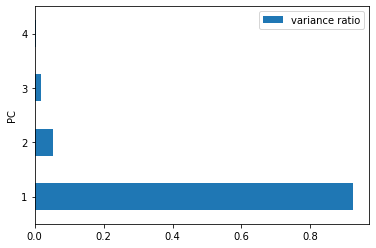

In [16]:
ax = p_df.plot.barh('PC')

In [17]:
trans = pca.transform(df.drop('species', axis=1))

In [18]:
df_transn = pd.DataFrame(data=trans)
df_transn.head(10)

,0,1,2,3
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
5,-2.279897,0.747783,0.174326,-0.027147
6,-2.820891,-0.082105,0.264251,-0.050100
7,-2.626482,0.170405,-0.015802,-0.046282
8,-2.887959,-0.570798,0.027335,-0.026615
9,-2.673845,-0.106692,-0.191533,-0.055891


## Dos componentes principales

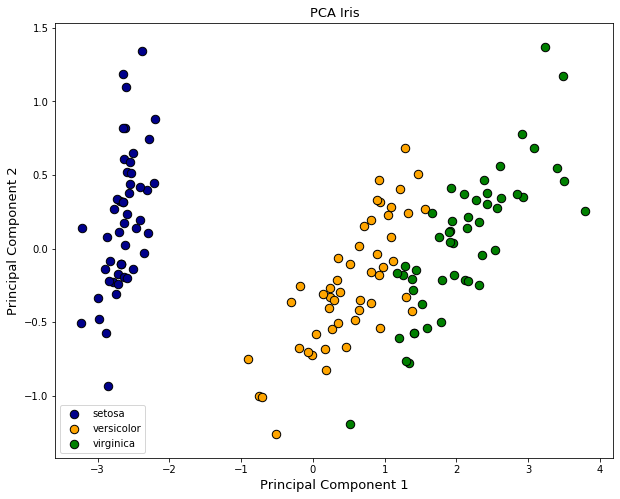

In [19]:
target_ids = np.unique(y)
plt.figure(figsize=(10,8))

for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(trans[i == y,0], trans[i == y,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.title('PCA Iris',fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)

plt.ylabel("Principal Component 2",fontsize=13)


plt.show()

## Tres componentes principales

- Con 'Axes3D' se puede visualizar en 3d

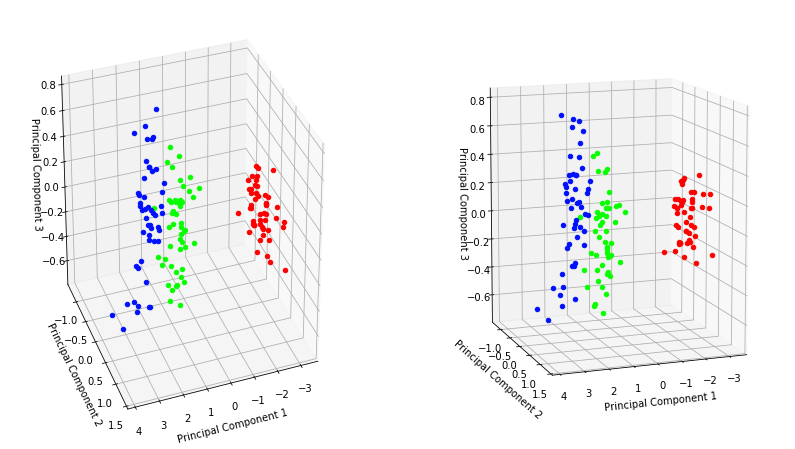

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1, 2, 1, projection="3d")
for i in range(trans.shape[0]):
    ax.scatter(trans[i, 0], trans[i, 1], trans[i, 2],color=plt.cm.hsv(y[i] / 3.),marker='o')
ax.view_init(30, 70)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

ax = fig.add_subplot(1, 2, 2, projection="3d")
for i in range(trans.shape[0]):
    ax.scatter(trans[i, 0], trans[i, 1], trans[i, 2],color=plt.cm.hsv(y[i] / 3.),marker='o')
ax.view_init(10, 70)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

# 

## PCA de Breast Cancer
-  Visualizar el dataset de los clasificadores anteriores


In [21]:
df = pd.read_csv("data-breast.csv",index_col=0)
df = df.replace({'B':0, 'M':1})
df.head()
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [22]:
y = df['diagnosis']
X = df.drop(['diagnosis','Unnamed: 32'],axis=1)
dfx = pd.DataFrame(data=X,columns=df.columns[1:31])
dfx.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


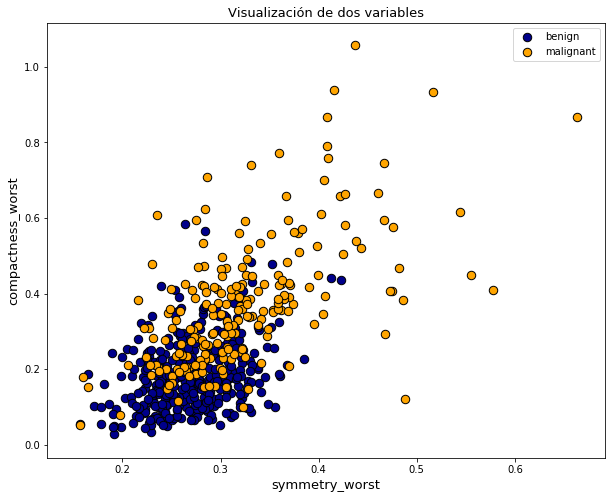

In [23]:
X_plot = np.concatenate(([df['symmetry_worst'].values], [df['compactness_worst'].values]), axis=0)
y = df['diagnosis'].values

plt.figure(figsize=(10,8))
colors = ['darkblue','orange']
target_names = ['benign', 'malignant']

for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_plot[0,i == y], X_plot[1,i == y], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.title("Visualización de dos variables",fontsize=13)
plt.xlabel("symmetry_worst",fontsize=13)
plt.ylabel("compactness_worst",fontsize=13)
plt.show()

In [24]:
pca = PCA(n_components=None)
trans = pca.fit_transform(dfx)

- Con PCA es más clara la separación de clases

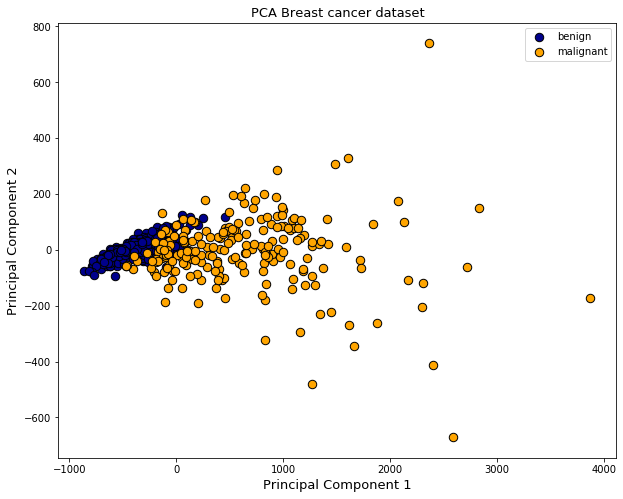

In [25]:
plt.figure(figsize=(10,8))
colors = ['darkblue','orange']
target_names = ['benign', 'malignant']

for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(trans[i == y,0], trans[i == y,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.title("PCA Breast cancer dataset",fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)
plt.show()

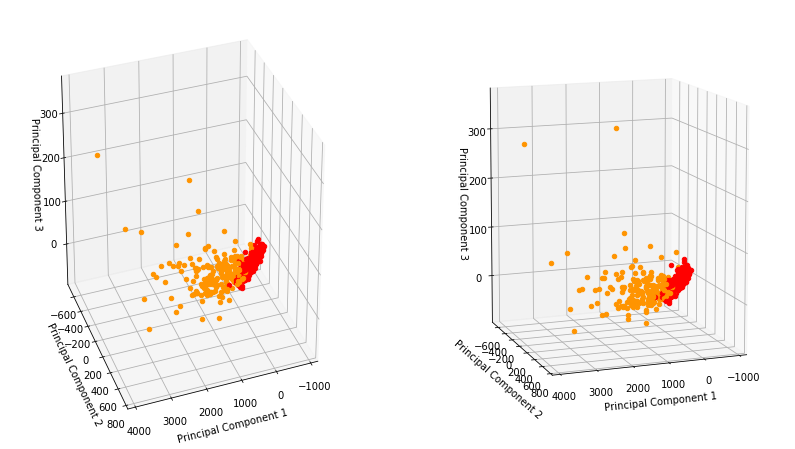

In [26]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1, 2, 1, projection="3d")
for i in range(trans.shape[0]):
    ax.scatter(trans[i, 0],trans[i, 1], trans[i, 2],color=plt.cm.hsv(y[i] / 10.),marker='o')
ax.view_init(30, 70)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

ax = fig.add_subplot(1, 2, 2, projection="3d")
for i in range(trans.shape[0]):
    ax.scatter(trans[i, 0], trans[i, 1], trans[i, 2],color=plt.cm.hsv(y[i] / 10.),marker='o')
ax.view_init(10, 70)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

# Visualizar dígitos
- El número de clases es mayor
- Se visualizan los pixeles de dígitos en 2 dimensiones

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [27]:
from tensorflow import keras

mnist = keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = x_test.reshape(x_test.shape[0], -1)
y = y_test

In [28]:
print(X.shape) 
print(y.shape)

(10000, 784)
(10000,)


- Solo algunos elementos

In [29]:
X = X[:500, :]
y = y[:500]

In [30]:
X = PCA(n_components=3).fit_transform(X)

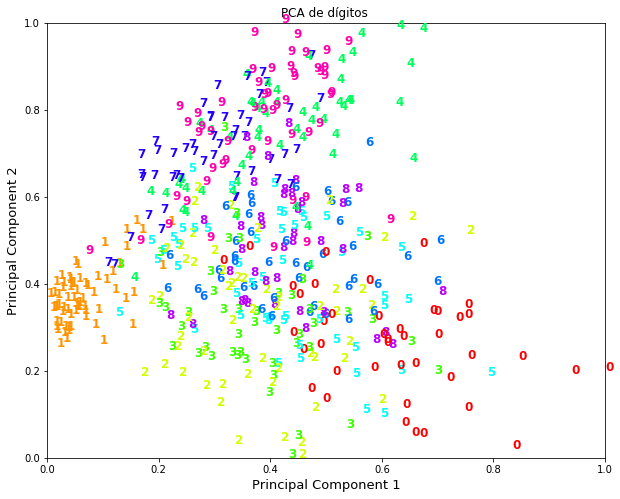

In [31]:
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)

plt.figure(figsize=(10,8))
for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.hsv(y[i] / 10.),
             fontdict={'weight': 'bold', 'size': 12})

plt.title("PCA de dígitos ")
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)
plt.show()

## Tres componenetes principales

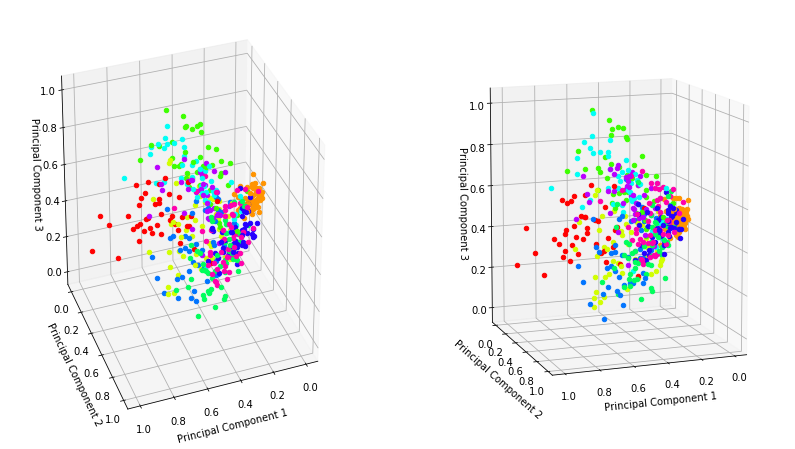

In [32]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1, 2, 1, projection="3d")
for i in range(X.shape[0]):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2],color=plt.cm.hsv(y[i] / 10.),marker='o')
ax.view_init(30, 70)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

ax = fig.add_subplot(1, 2, 2, projection="3d")
for i in range(X.shape[0]):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2],color=plt.cm.hsv(y[i] / 10.),marker='o')
ax.view_init(10, 70)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

- Se obtiene una visualización de datos de alta dimensión
- Probar PCA con diferentes datasets, después aplicar clasificación